In [36]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [37]:
import pandas as pd

df = pd.read_csv('cleaned_1015.csv')

df

,Unnamed: 0,TITLE,ID,POPULARITY,VOTE_AVERAGE,RELEASE_DATE,ORIGINAL_LANGUAGE,BUDGET,REVENUE,YEAR_RELEASED,DECADE_RELEASED,KEYWORDS,MAIN_GENRE
0,0,Avatar,19995,538.894,7.6,2009-12-15,en,237000000,2920357254,2009,2000s,"['culture clash', ' future', ' space war', ' s...",Action
1,1,Avengers: Endgame,299534,224.007,8.3,2019-04-24,en,356000000,2799439100,2019,2010s,"['space travel', ' time travel', ' time machin...",Adventure
2,2,Avatar: The Way of Water,76600,1124.883,7.7,2022-12-14,en,460000000,2293000000,2022,2020s,"['loss of loved one', ' dying and death', ' al...",Science Fiction
3,3,Titanic,597,173.561,7.9,1997-11-18,en,200000000,2187463944,1997,1990s,"['drowning', ' evacuation', ' shipwreck', ' ic...",Drama
4,4,Star Wars: The Force Awakens,140607,59.017,7.3,2015-12-15,en,245000000,2068223624,2015,2010s,"['android', ' spacecraft', ' space opera']",Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,6966,At Long Last Love,4704,2.956,5.5,1975-03-01,en,6000000,1500000,1975,1970s,"['gambling', ' singer']",Comedy
6967,6967,Under Capricorn,4175,7.906,6.0,1949-09-08,en,2500000,1500000,1949,Before 1960s,"['loss of loved one', ' ""love of ones life""', ...",Crime
6968,6968,Stolen Kisses,255,10.010,7.3,1968-09-04,fr,350000,1500000,1968,1960s,"['individual', ' paris', ' france', ' shyness'...",Comedy
6969,6969,To Be or Not to Be,198,9.185,7.9,1942-03-05,en,1200000,1500000,1942,Before 1960s,"['love triangle', ' london', ' england', ' inf...",Comedy


In [40]:
df = df.dropna(subset=['MAIN_GENRE'])

df.isnull().sum()

Unnamed: 0           0
TITLE                0
ID                   0
POPULARITY           0
VOTE_AVERAGE         0
RELEASE_DATE         0
ORIGINAL_LANGUAGE    0
BUDGET               0
REVENUE              0
YEAR_RELEASED        0
DECADE_RELEASED      0
KEYWORDS             0
MAIN_GENRE           0
dtype: int64

In [41]:
# Convert dataframe to matrix
df_kmods = df.loc[:, ['DECADE_RELEASED', 'MAIN_GENRE']].to_numpy()

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


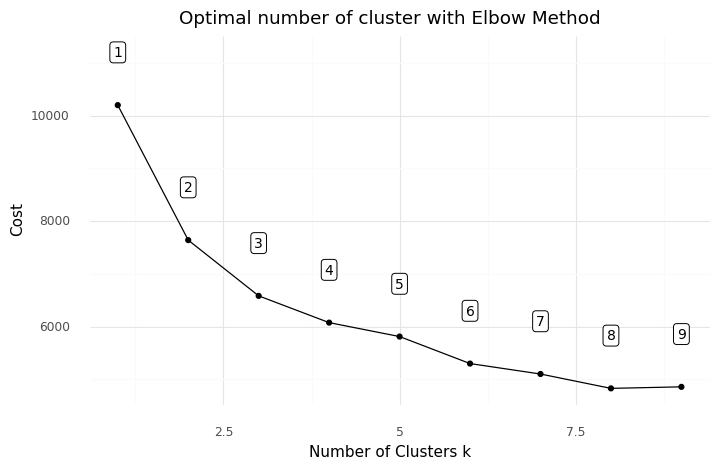

<ggplot: (8784559763417)>

In [42]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(df_kmods)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [43]:
# Fit the cluster
kmodes = KModes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kmodes.fit_predict(df_kmods)

# Cluster centorid
kmodes.cluster_centroids_
# Check the iteration of the clusters created
kmodes.n_iter_
# Check the cost of the clusters created
kmodes.cost_

6582.0

In [44]:
# Cluster centorid
kmodes.cluster_centroids_

array([['1990s', 'Action'],
       ['2000s', 'Comedy'],
       ['2010s', 'Drama']], dtype='<U6')

In [15]:
# Check the iteration of the clusters created
kmodes.n_iter_

1

In [16]:
# Check the cost of the clusters created
kmodes.cost_

1719.0